<a href="https://colab.research.google.com/github/Moogun/img_processing/blob/master/audio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Handling Basics 

https://hackernoon.com/audio-handling-basics-how-to-process-audio-files-using-python-cli-jo283u3y

I need 

- volume level from long mp3 (eg. 5 mins long) 
- exact time of the volume pick in the file 
- convert the time info into array or something 

- trim mp4 with the time info  

- 



# Handling Audio Command Line 

1. To convert video to audio 
- ffmpeg -i video.mkv audio.mp3 


2. Downsampling to 16 Khz, converting stereo to mono (2ch average) and converting MP3 to WAV needs to use the -ar (audio rate) -ac (audio channel) properties 

- ffmpeg -i audio.wav -ar 16000 -ac 1 audio_16k_mono.wav 


3. To trim, from 60th to 80th seconds for 20 sec duration 
- ffmpeg -i audio.wav --ss 60 -t 20 audio_small.wav 

4. Concatenate -> prepare txt file with a file list to be concatenated
- ffmpeg -f concat -i list_of_all_files_to_concat -c copy output.wav  

5. breaking an audio file into segments ... 

6. ...

# Handling Audio Programming Way 

numpy 

In [ ]:
https://hackernoon.com/audio-handling-basics-how-to-process-audio-files-using-python-cli-jo283u3y


SyntaxError: ignored

In [ ]:
!pip install pydub
!pip install librosa

In [2]:
from pydub import AudioSegment, silence
import numpy as np
from scipy.io import wavfile
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly

In [ ]:
!ffmpeg -i /content/cam_sub.mp4

In [ ]:
!ffmpeg -i /content/cam_sub.mp4 -vn \
       -acodec libmp3lame -ac 2 -ab 160k -ar 48000 \
        audio.mp3

In [ ]:
audiofile = AudioSegment.from_file("/content/audio.mp3")
data_mp3 = np.array(audiofile.get_array_of_samples())
fs_mp3 = audiofile.frame_rate

In [ ]:
data_mp3

array([  0,   0,   0, ...,  12, -17,  38], dtype=int16)

In [ ]:
len(data_mp3)

24741888

In [ ]:
data_mp3.dtype

dtype('int16')

In [ ]:
data_mp3.shape

(24741888,)

In [ ]:
data_mp3[0: 10000]

array([  0,   0,   0, ..., -48, -61, -77], dtype=int16)

In [ ]:
# !pip install sox
# !pip install sounddevice

In [ ]:
import sox
sox

<module 'sox' from '/usr/local/lib/python3.7/dist-packages/sox/__init__.py'>

# Create a transformer 
tfm = sox.transformer() 

# trim btw 5 and 10.5 seconds 
tfm.trim(5, 10,5) 

# fade in and out 
tf.fade(fade_in_len=1.0, fade_out_len(0.5)

# create an output file 
tfm.build_file('path/to/audio.extension' , 'path/to/audio.extension') 

##  
## 2. Transform in memory array 
## 3. Concatenate 3 audio files  
## 4.  
## 2. Transform in memory array 


In [ ]:
from pydub.playback import play

In [ ]:
audioFile = AudioSegment.from_mp3("/content/audio.mp3")


In [ ]:
play(audioFile)

In [ ]:
length = len(audioFile)
audioLength = length /1000
audioLength

4.295466666666667

In [ ]:
audioFile.frame_rate

In [ ]:
audiofile.channels

2

In [ ]:
len(audiofile)

257728

In [ ]:
audiofile.max

32768

In [ ]:
audiofile.min

AttributeError: ignored

In [ ]:
loudness = audiofile.dBFS
loudness

-30.690759943657483

In [ ]:
audiofile.max_dBFS

0.0

In [ ]:
audiofile.max_possible_amplitude

32768.0

In [ ]:
nonSilent = silence.detect_nonsilent(audiofile, silence_thresh=-33)
nonSilent

[[1023, 4462],
 [6001, 6048],
 [11465, 11761],
 [12943, 14393],
 [15621, 16743],
 [27547, 27611],
 [28822, 28834],
 [33976, 34035],
 [35276, 35316],
 [40551, 42265],
 [46369, 46685],
 [53131, 54168],
 [59726, 59770],
 [65842, 65907],
 [67042, 68149],
 [79450, 79455],
 [80488, 80542],
 [81723, 82584],
 [85133, 85198],
 [92085, 92088],
 [96486, 96507],
 [101380, 101619],
 [104679, 104974],
 [113678, 113735],
 [116184, 116192],
 [120526, 120666],
 [129204, 130065],
 [133652, 133710],
 [138962, 139096],
 [145798, 146363],
 [150520, 150590],
 [152267, 152385],
 [156837, 157074],
 [159037, 159110],
 [161065, 161815],
 [170469, 171536],
 [172955, 173048],
 [176948, 177122],
 [178482, 178528],
 [187810, 187941],
 [191659, 192120],
 [199675, 199735],
 [203972, 205450],
 [213477, 213625],
 [216088, 216392],
 [222681, 222824],
 [225666, 225770],
 [230629, 230636],
 [236705, 237852],
 [244651, 245234],
 [255641, 256121]]

In [ ]:
len(nonSilent)

51

In [ ]:
# convert mp4 to mp3 
# read the mp3 with AudioSegment 
# get loudness = audiofile.dBFS
# test silence.detect_nonsilent

# !ffmpeg -i /content/cam_main_VID_20210925_151307[1].mp4 -vn \
#        -acodec libmp3lame -ac 2 -ab 160k -ar 48000 \
#         audio.mp3

# !ffmpeg -i /content/cam_main_VID_20210925_151307[1].mp4
!ffmpeg -i /content/cam_main_VID_20210925_151307[1].mp4 -ac 2 -f wav aud.wav
# aud = AudioSegment.from_mp3("/content/aud.mp3")
# aud.dBFS, len(aud)



ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
noS = silence.detect_nonsilent(aud, silence_thresh=-18)
noS

[[1059, 1063]]

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



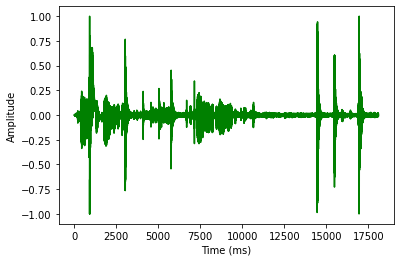

In [ ]:
# https://stackoverflow.com/questions/43284049/spectrogram-of-a-wave-file?

myAudio = "/content/aud.wav"

#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq

#If two channels, then select only one channel
mySoundOneChannel = mySound[:,0]

#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 1000

#Plot the tone
plt.plot(timeArray, mySoundOneChannel, color='G')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
signalDuration

18.090666666666667

In [ ]:
samplingFreq

48000

In [ ]:
timeArray

array([0.00000000e+00, 2.08333333e-02, 4.16666667e-02, ...,
       1.80906042e+04, 1.80906250e+04, 1.80906458e+04])

In [ ]:
t = timeArray / 6000

868352

# Librosa

In [3]:
import librosa 
audio = '/content/audio.mp3'
arr, sr = librosa.load(audio)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning:

PySoundFile failed. Trying audioread instead.



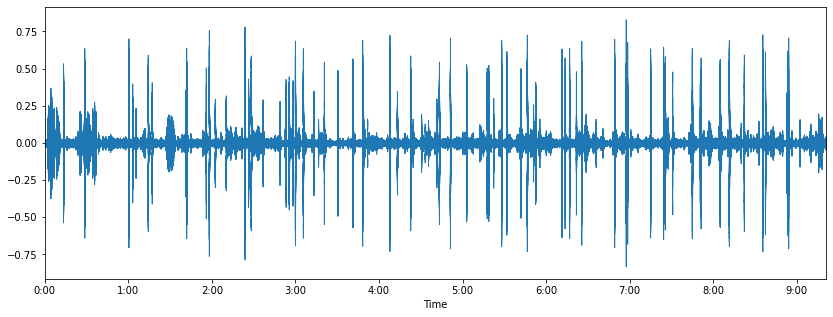

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(arr)

In [10]:
!ffmpeg -i /content/cam.mp4 -vn \
       -acodec libmp3lame -ac 2 -ab 160k -ar 48000 \
        aud.mp3

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
!ffmpeg -i /content/cam.mp4 -vn \
       -acodec libmp3lame -ac 2 -ab 160k -ar 48000 \
        aud.mp3

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning:

PySoundFile failed. Trying audioread instead.



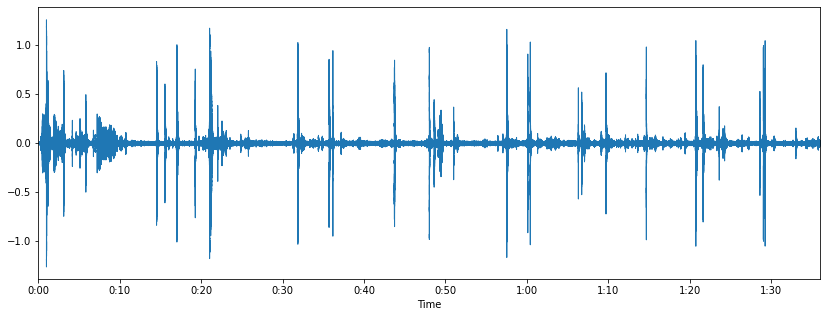

In [11]:
audio = '/content/aud.mp3'
ar, sr = librosa.load(audio)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ar)

In [12]:
!ffmpeg -i /content/cam.mp4 -ac 2 -f wav aud_wav.wav

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [13]:
!ffmpeg -i /content/cam.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

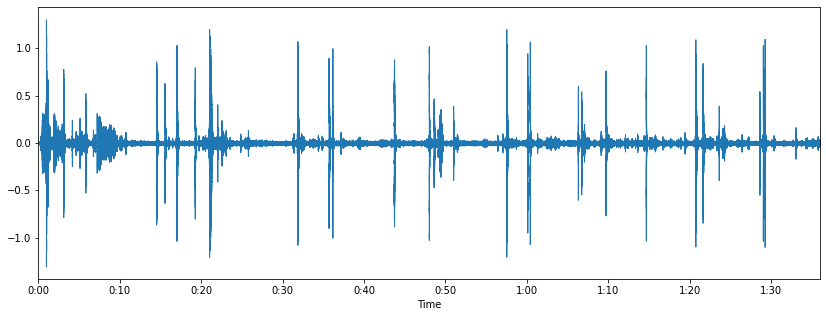

In [14]:
audio = '/content/aud_wav.wav'
ar_wav, sr = librosa.load(audio)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ar_wav)

In [15]:
ar_wav

array([ 0.        ,  0.        ,  0.        , ..., -0.00339475,
       -0.00642159,  0.        ], dtype=float32)

In [17]:
ar_wav.max()

1.2016788

In [18]:
sr

22050

In [19]:
len(ar_wav) / sr

95.97868480725623

In [46]:
candidatesOfSwing = ar_wav > 0.8 
candidatesOfSwing

array([False, False, False, ..., False, False, False])

In [47]:
positions = np.where(candidatesOfSwing == 1)
positions 

(array([  20339,   20344,   20347,   20352,  319131,  373539,  373542,
         373543,  373544,  373545,  373546,  373757,  373826,  462312,
         465193,  465208,  465209,  465211,  465212,  465215,  465219,
         465221,  465222,  465227,  465232,  465240,  465241,  465242,
         465243,  465244,  465251,  465252,  465259,  465260,  465264,
         465269,  465270,  465272,  465282,  465283,  465290,  465291,
         465300,  465301,  465305,  465308,  465309,  465312,  465313,
         465314,  465323,  465324,  465326,  465333,  465334,  465336,
         465340,  465341,  465343,  465344,  465346,  465347,  465348,
         465351,  465352,  465358,  465362,  465365,  465366,  465372,
         465373,  465374,  465376,  465377,  465380,  465381,  465386,
         465387,  465390,  465391,  465394,  465395,  465400,  465401,
         465404,  465407,  465409,  465410,  465412,  465413,  465416,
         465417,  465425,  465426,  465429,  465430,  465436,  465441,
      

In [48]:
positions[0]

array([  20339,   20344,   20347,   20352,  319131,  373539,  373542,
        373543,  373544,  373545,  373546,  373757,  373826,  462312,
        465193,  465208,  465209,  465211,  465212,  465215,  465219,
        465221,  465222,  465227,  465232,  465240,  465241,  465242,
        465243,  465244,  465251,  465252,  465259,  465260,  465264,
        465269,  465270,  465272,  465282,  465283,  465290,  465291,
        465300,  465301,  465305,  465308,  465309,  465312,  465313,
        465314,  465323,  465324,  465326,  465333,  465334,  465336,
        465340,  465341,  465343,  465344,  465346,  465347,  465348,
        465351,  465352,  465358,  465362,  465365,  465366,  465372,
        465373,  465374,  465376,  465377,  465380,  465381,  465386,
        465387,  465390,  465391,  465394,  465395,  465400,  465401,
        465404,  465407,  465409,  465410,  465412,  465413,  465416,
        465417,  465425,  465426,  465429,  465430,  465436,  465441,
        465442,  465

In [58]:
timeEstimatation_raw = positions[0] / sr 
timeEstimatation_raw

array([ 0.92240363,  0.92263039,  0.92276644,  0.9229932 , 14.47306122,
       16.94054422, 16.94068027, 16.94072562, 16.94077098, 16.94081633,
       16.94086168, 16.95043084, 16.95356009, 20.96653061, 21.09718821,
       21.09786848, 21.09791383, 21.09800454, 21.09804989, 21.09818594,
       21.09836735, 21.09845805, 21.0985034 , 21.09873016, 21.09895692,
       21.09931973, 21.09936508, 21.09941043, 21.09945578, 21.09950113,
       21.09981859, 21.09986395, 21.10018141, 21.10022676, 21.10040816,
       21.10063492, 21.10068027, 21.10077098, 21.10122449, 21.10126984,
       21.1015873 , 21.10163265, 21.10204082, 21.10208617, 21.10226757,
       21.10240363, 21.10244898, 21.10258503, 21.10263039, 21.10267574,
       21.1030839 , 21.10312925, 21.10321995, 21.10353741, 21.10358277,
       21.10367347, 21.10385488, 21.10390023, 21.10399093, 21.10403628,
       21.10412698, 21.10417234, 21.10421769, 21.10435374, 21.10439909,
       21.1046712 , 21.10485261, 21.10498866, 21.10503401, 21.10

In [57]:
b = [1.351, 2.134, 2.137] 
np.around(b, decimals=2)

array([1.35, 2.13, 2.14])

In [59]:
timeEstimatation_around = np.around(timeEstimatation_raw, decimals=1)
timeEstimatation_around

array([ 0.9,  0.9,  0.9,  0.9, 14.5, 16.9, 16.9, 16.9, 16.9, 16.9, 16.9,
       17. , 17. , 21. , 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1,
       21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21.1, 21

In [60]:
timeEstimatation_around_unique = np.unique(timeEstimatation_around)
timeEstimatation_around_unique

array([ 0.9, 14.5, 16.9, 17. , 21. , 21.1, 21.2, 31.8, 43.7, 48. , 57.5,
       60.4, 74.6, 80.7, 89. , 89.2])

In [92]:
tester = timeEstimatation_around_unique[0: 8]
tester

array([ 0.9, 14.5, 16.9, 17. , 21. , 21.1, 21.2, 31.8])

In [105]:
# candidates = [] 
# num = 0;

# for t in tester: 
#   if (len(candidates) == 0):
#     print("no candid",t)
#     candidates.append(t)
#     num = t 

#   else: 
#     print("t : ", t)
#     print("num-t : ", num-t)
#     print("abs num-t : ", abs(num-t))

#     if (abs(num-t) < 0.3):
#       print("abs(num-t) < 0.3 ---- DO NOT update num", num)
#     else:
#       num = t
#       candidates.append(t)
#       print("abs(num-t) > 0.3 update ", num)

# print("candidates -- final ", candidates)


def findSwingTime(tester): 
  
  candidates = [] 
  num = 0;
  for t in tester: 
    if (len(candidates) == 0):
      candidates.append(t)
      num = t 

    else: 
      if (abs(num-t) < 0.3):
        pass
      else:
        num = t
        candidates.append(t)
  
  return candidates   

In [106]:
print(findSwingTime(timeEstimatation_around_unique))

[0.9, 14.5, 16.9, 21.0, 31.8, 43.7, 48.0, 57.5, 60.4, 74.6, 80.7, 89.0]
